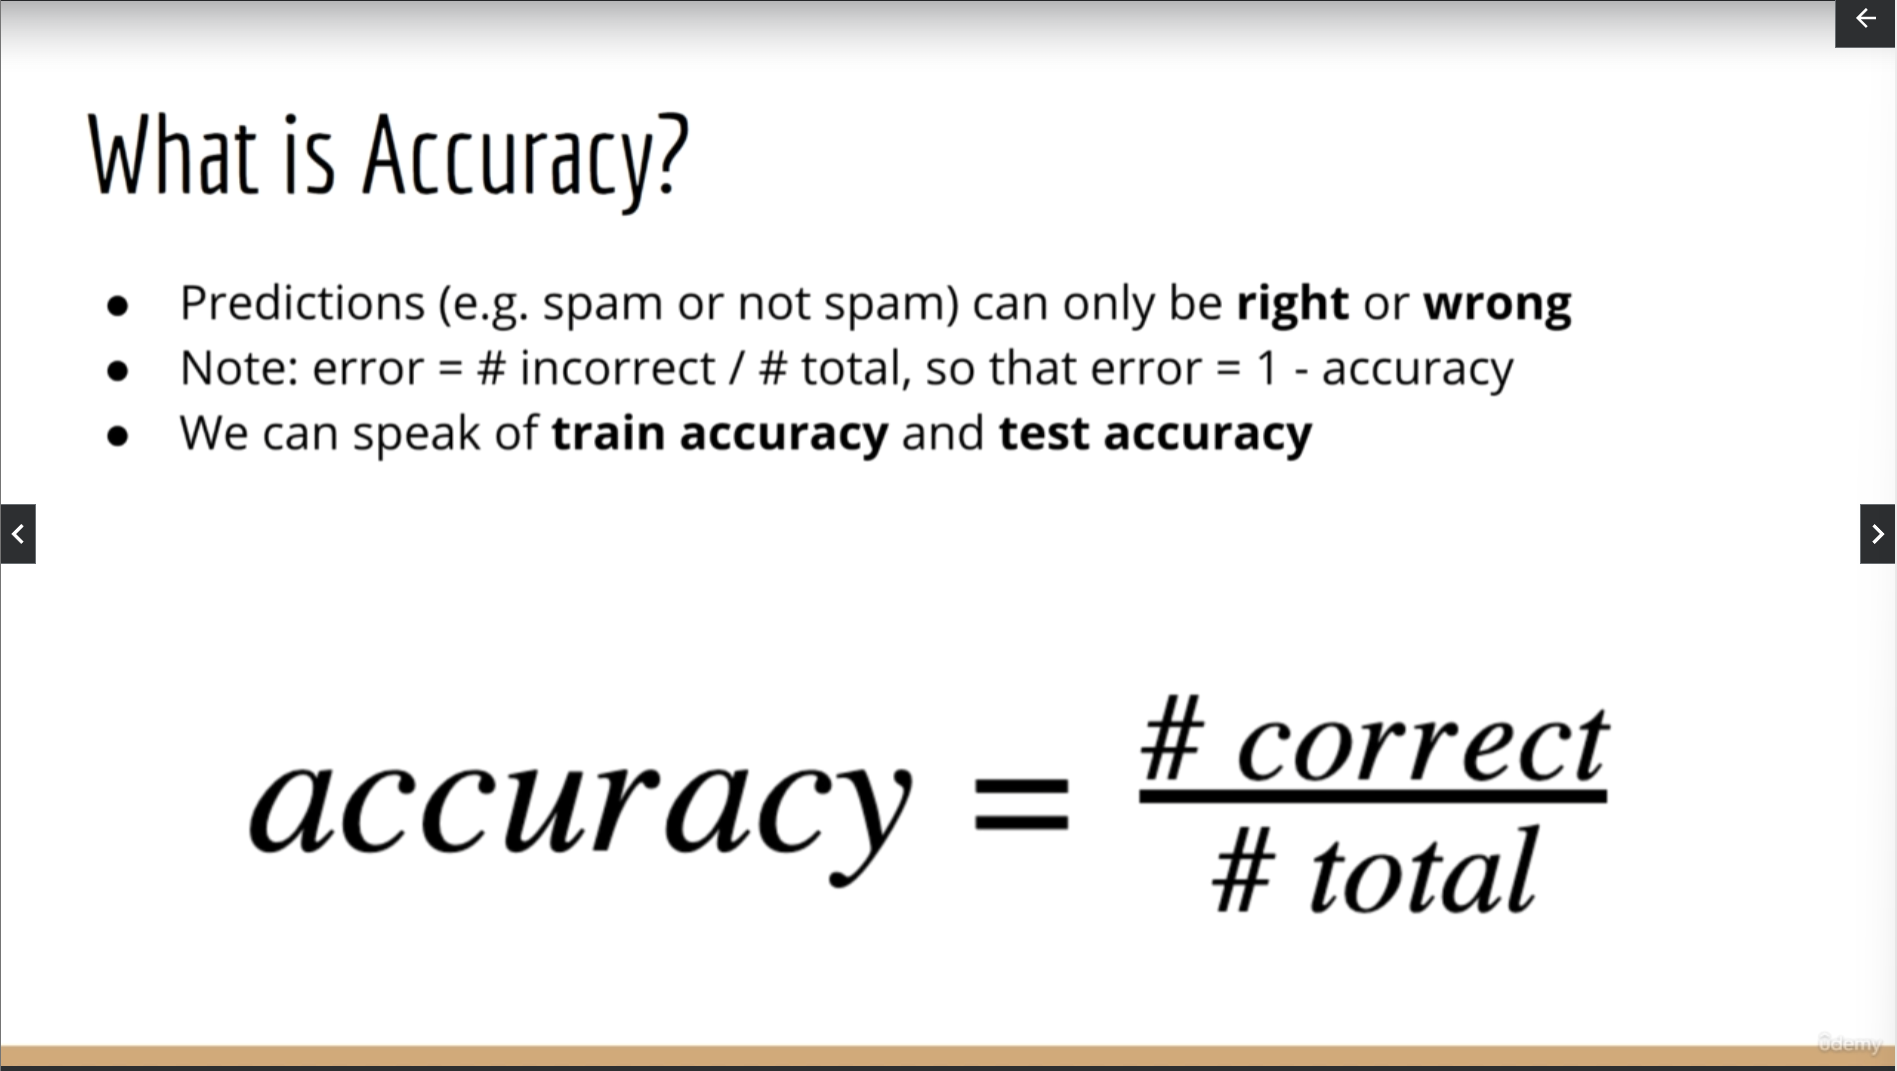

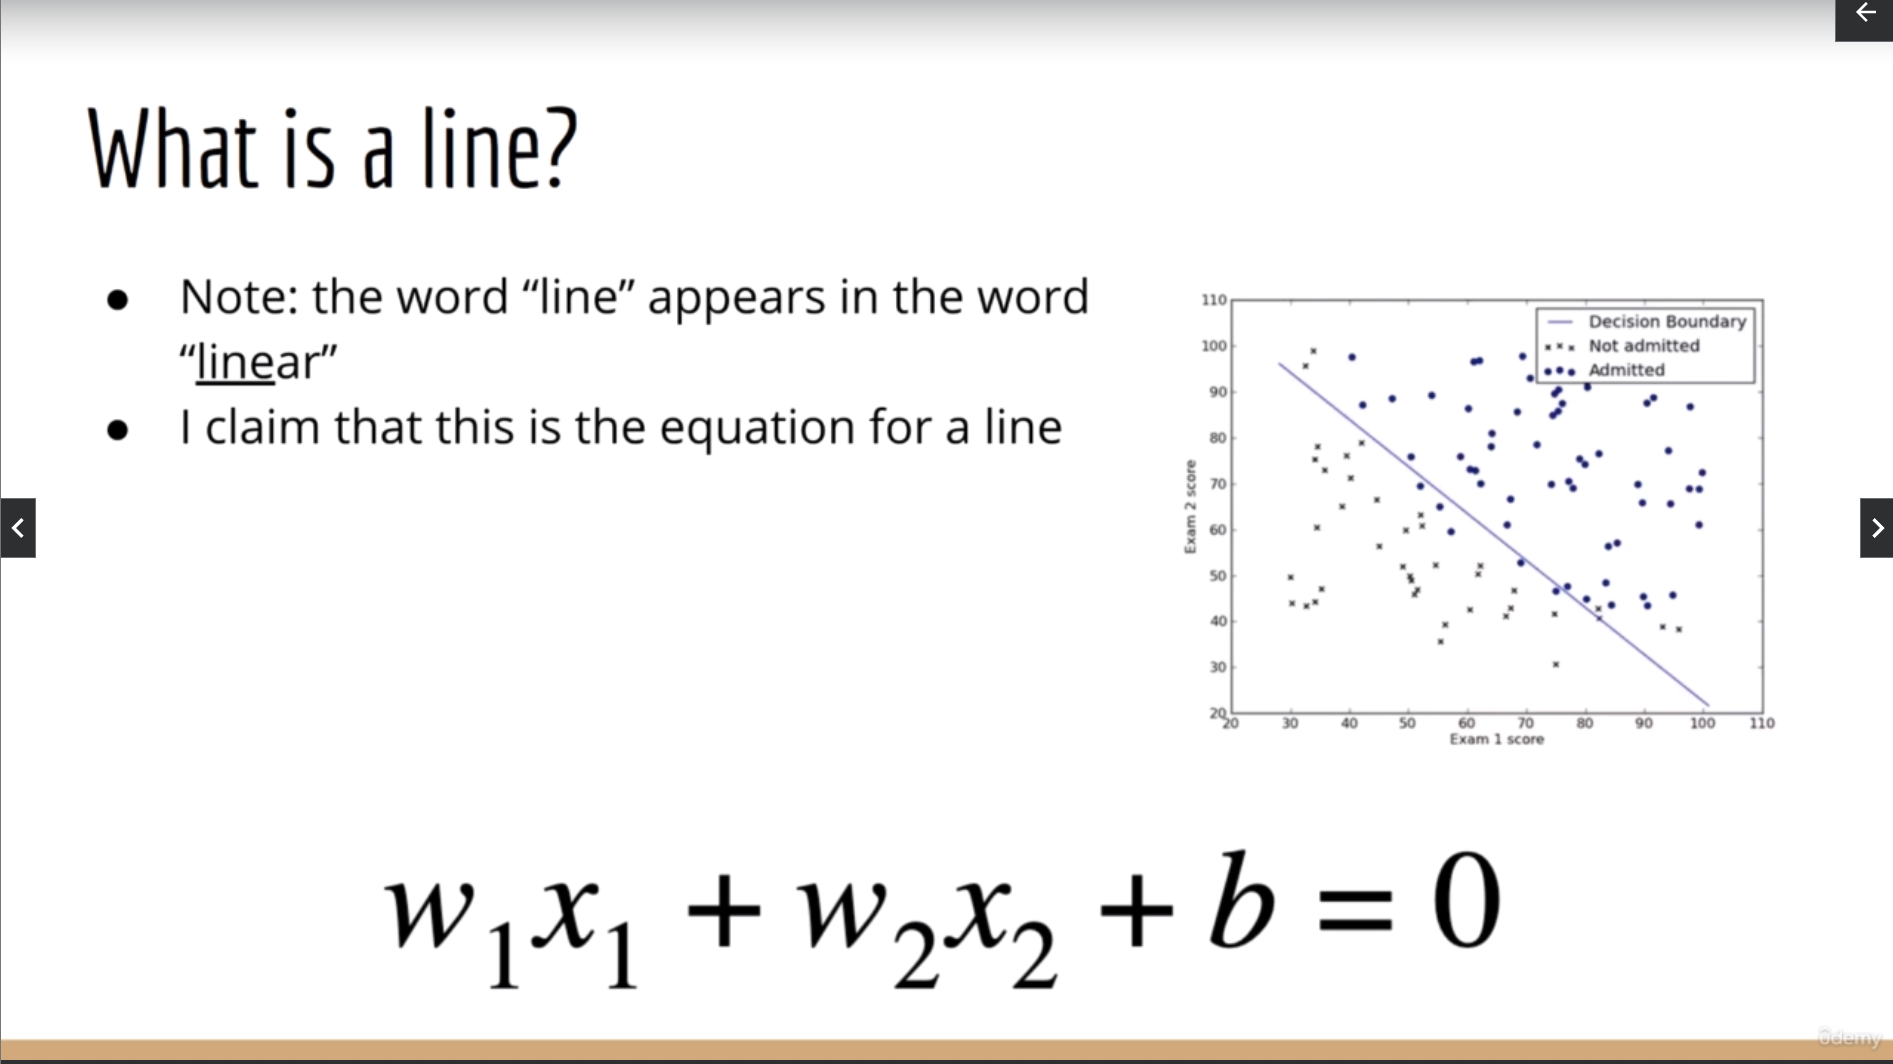

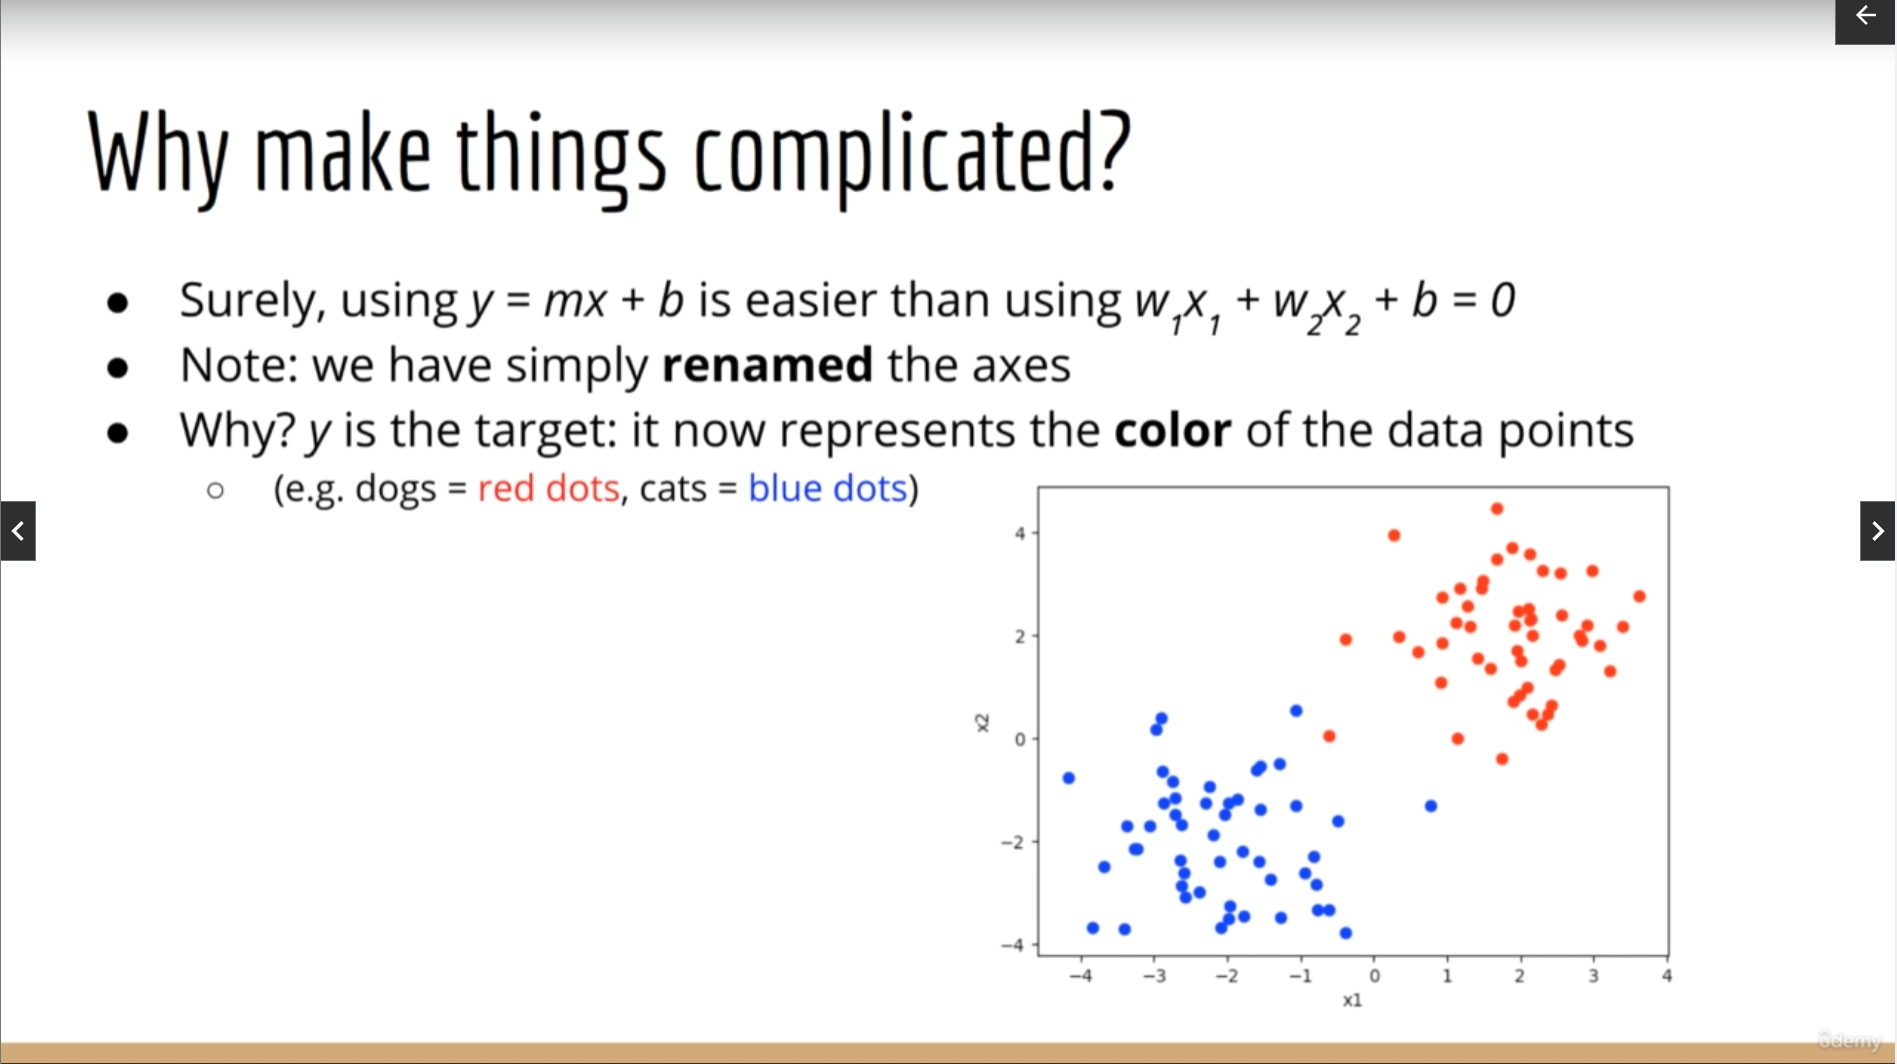

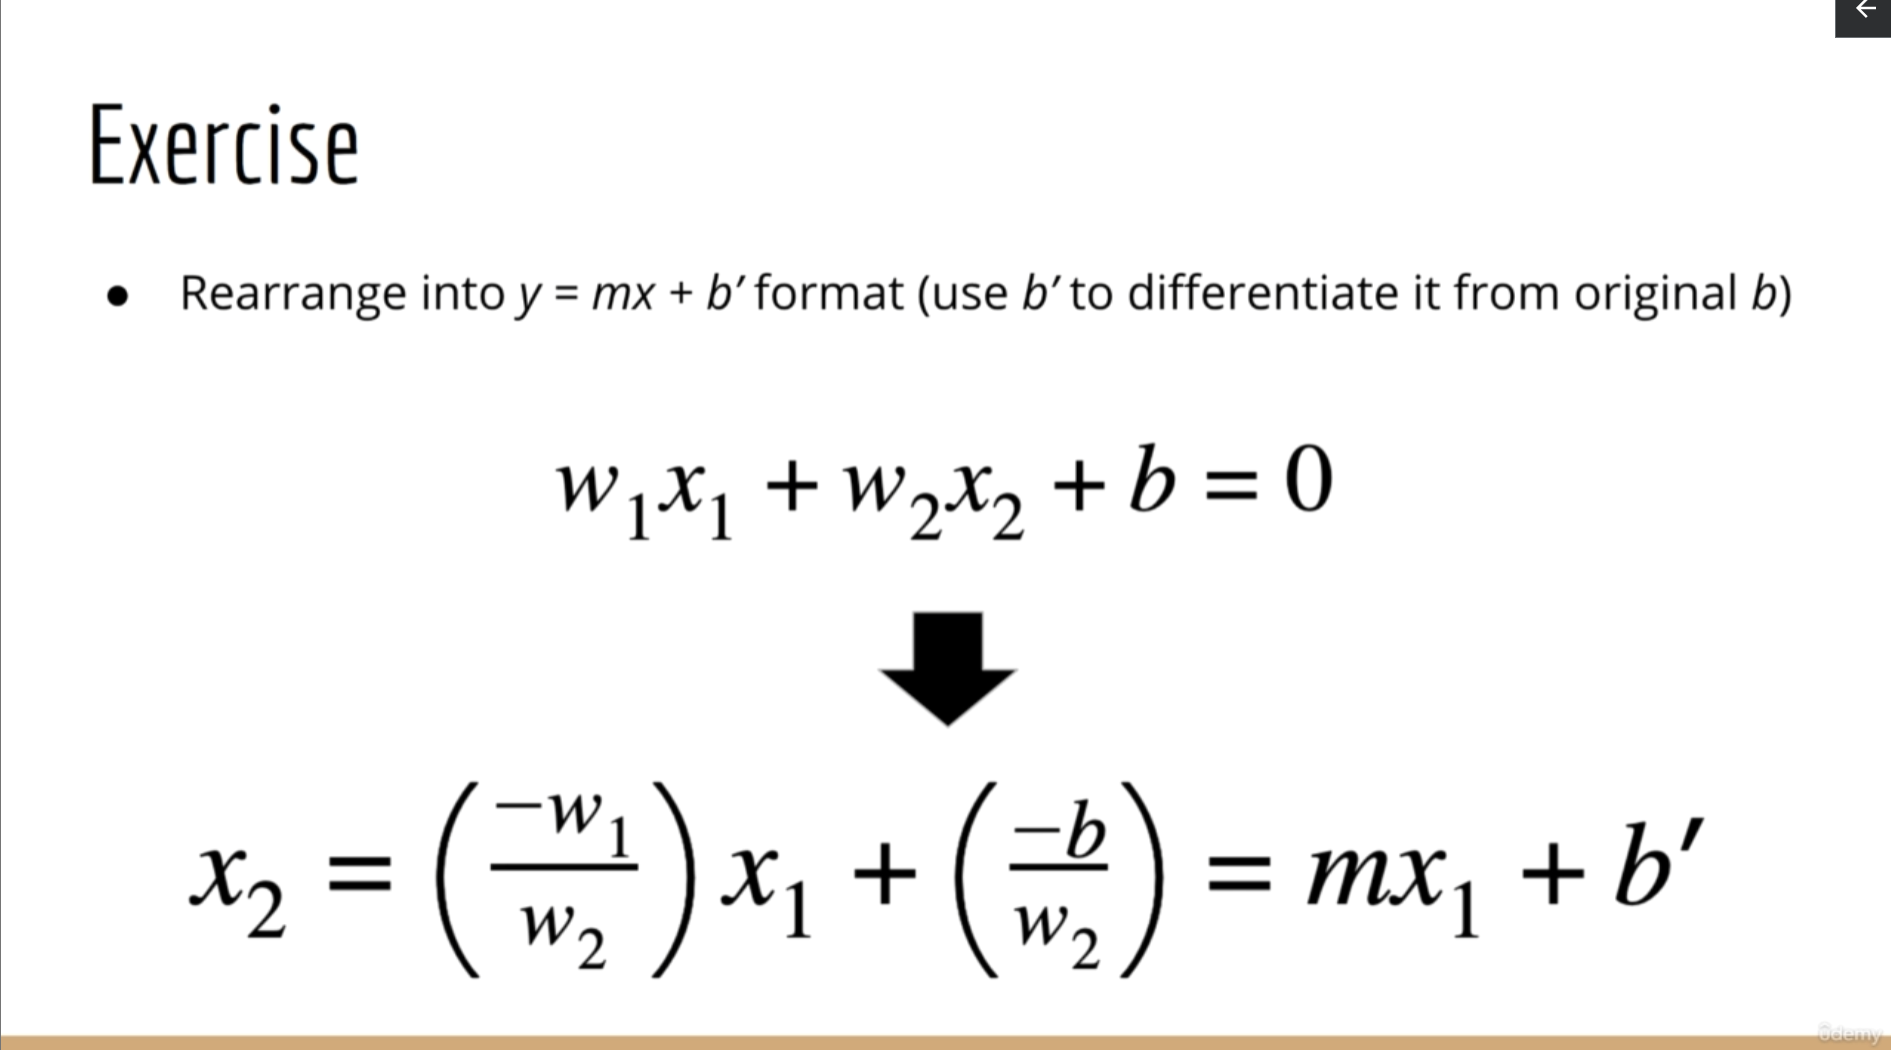

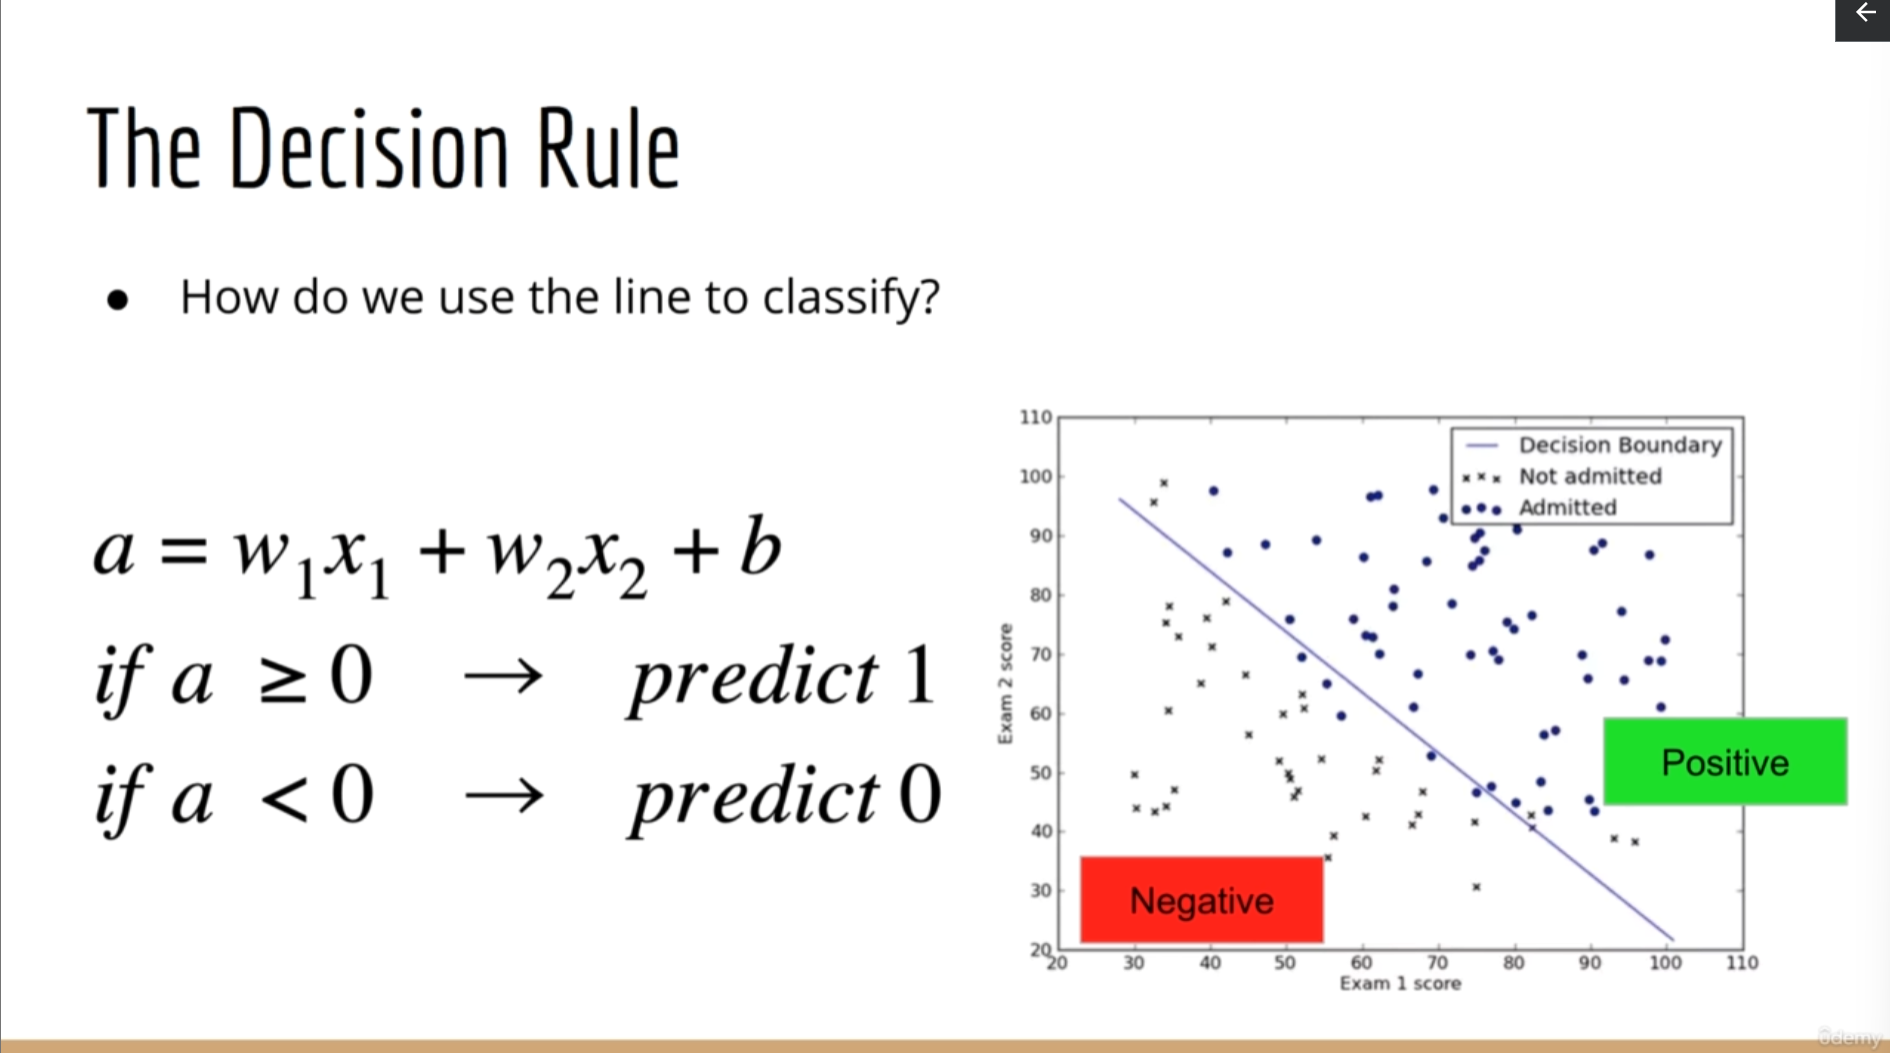

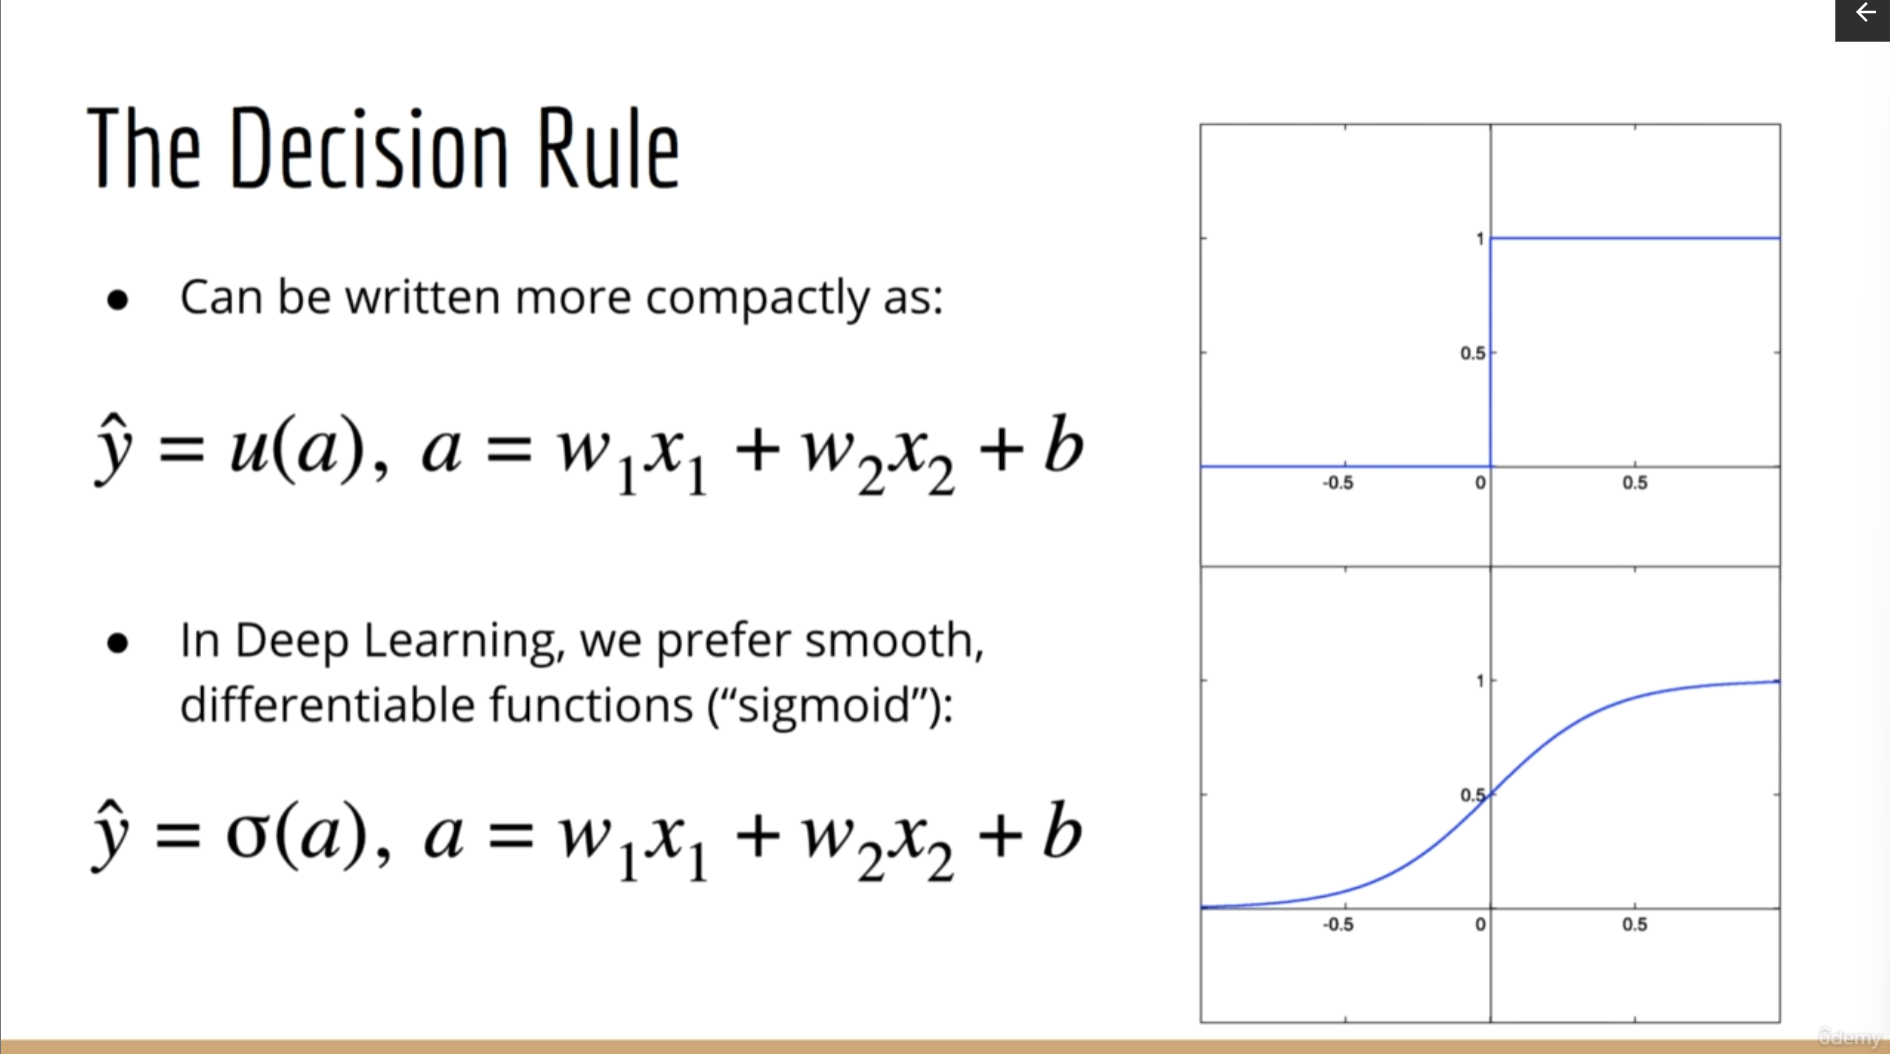

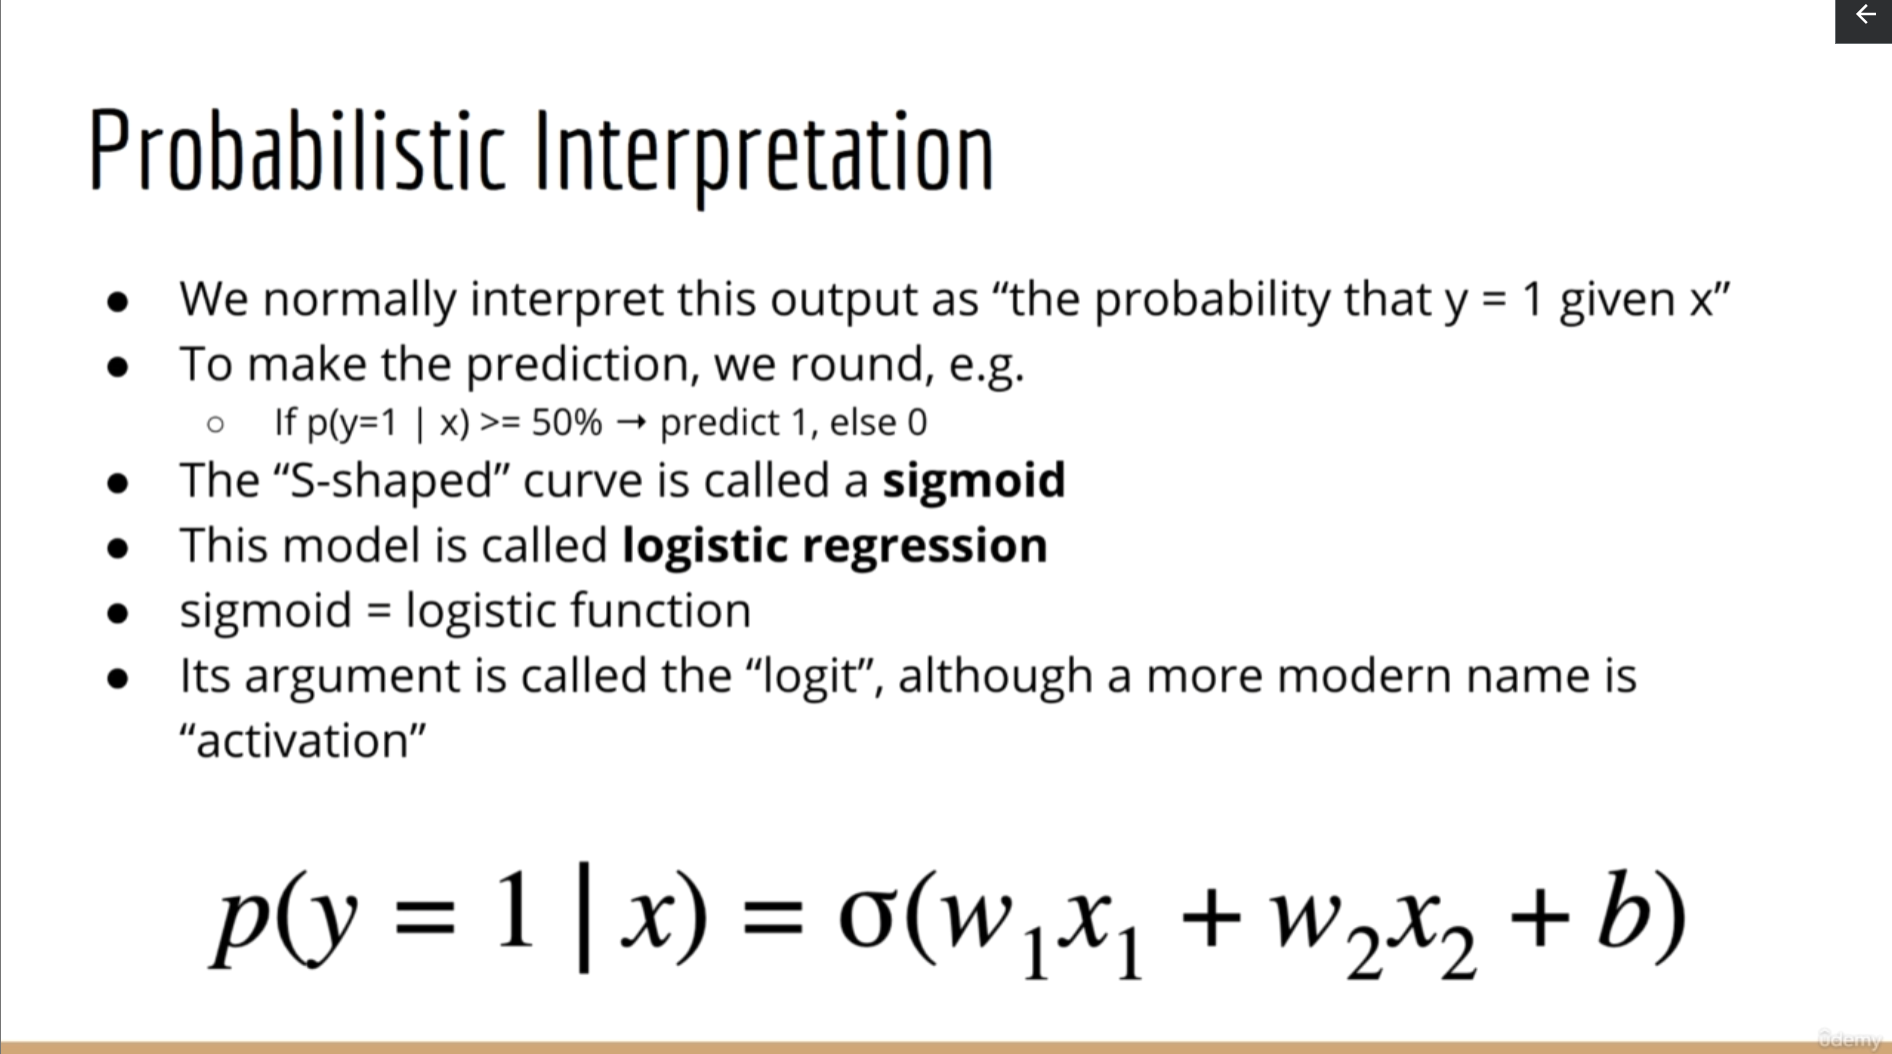

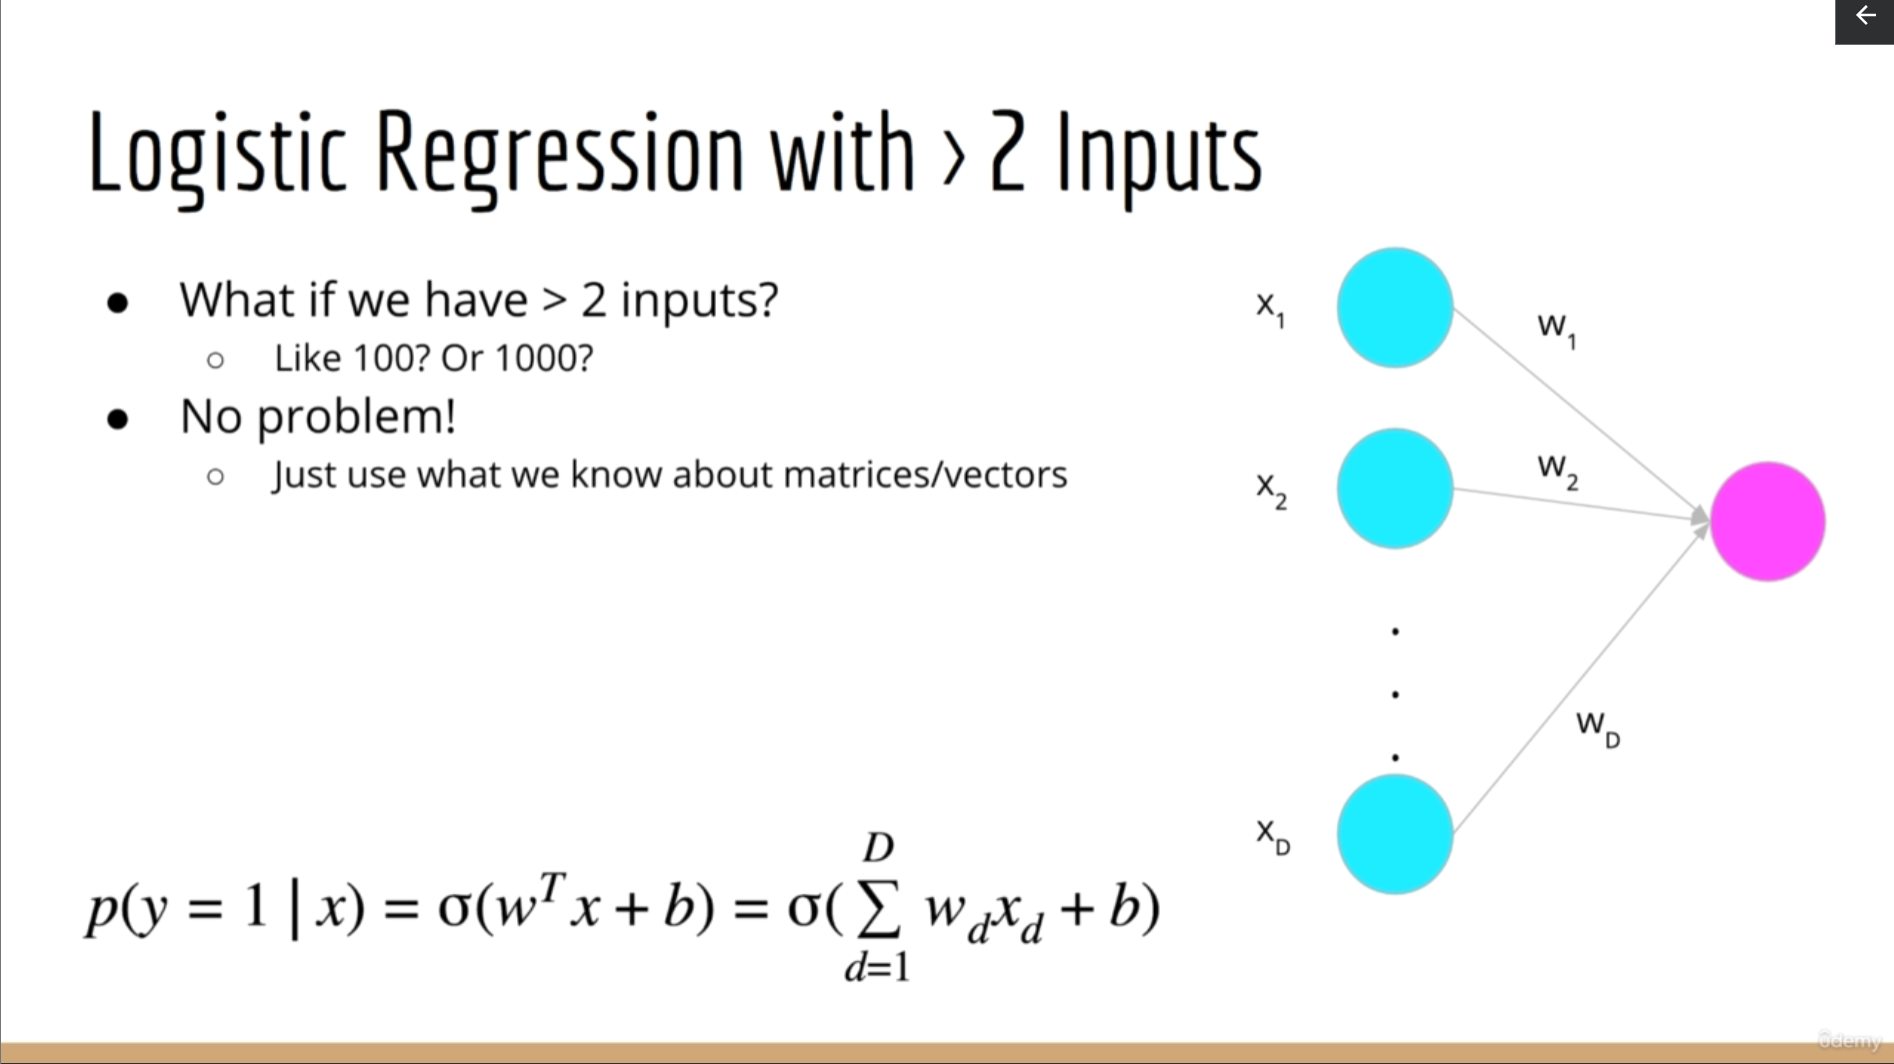

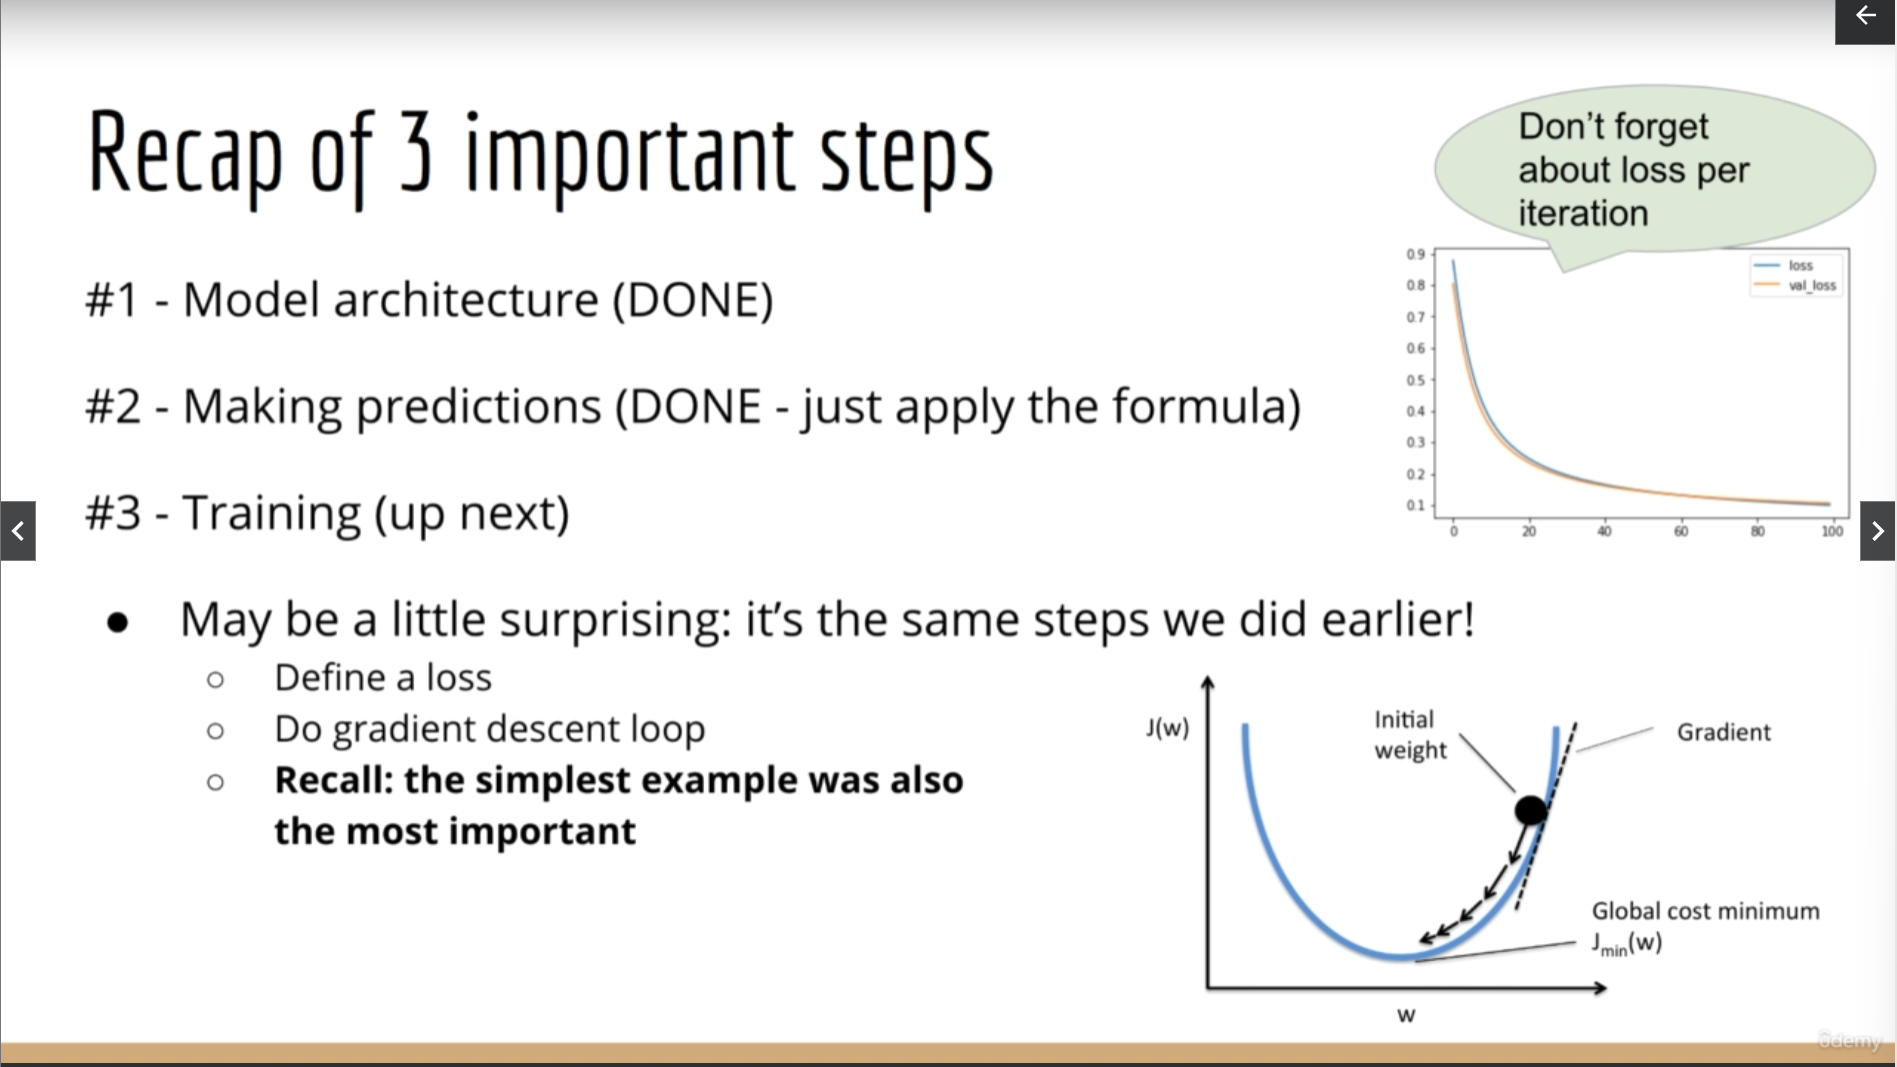

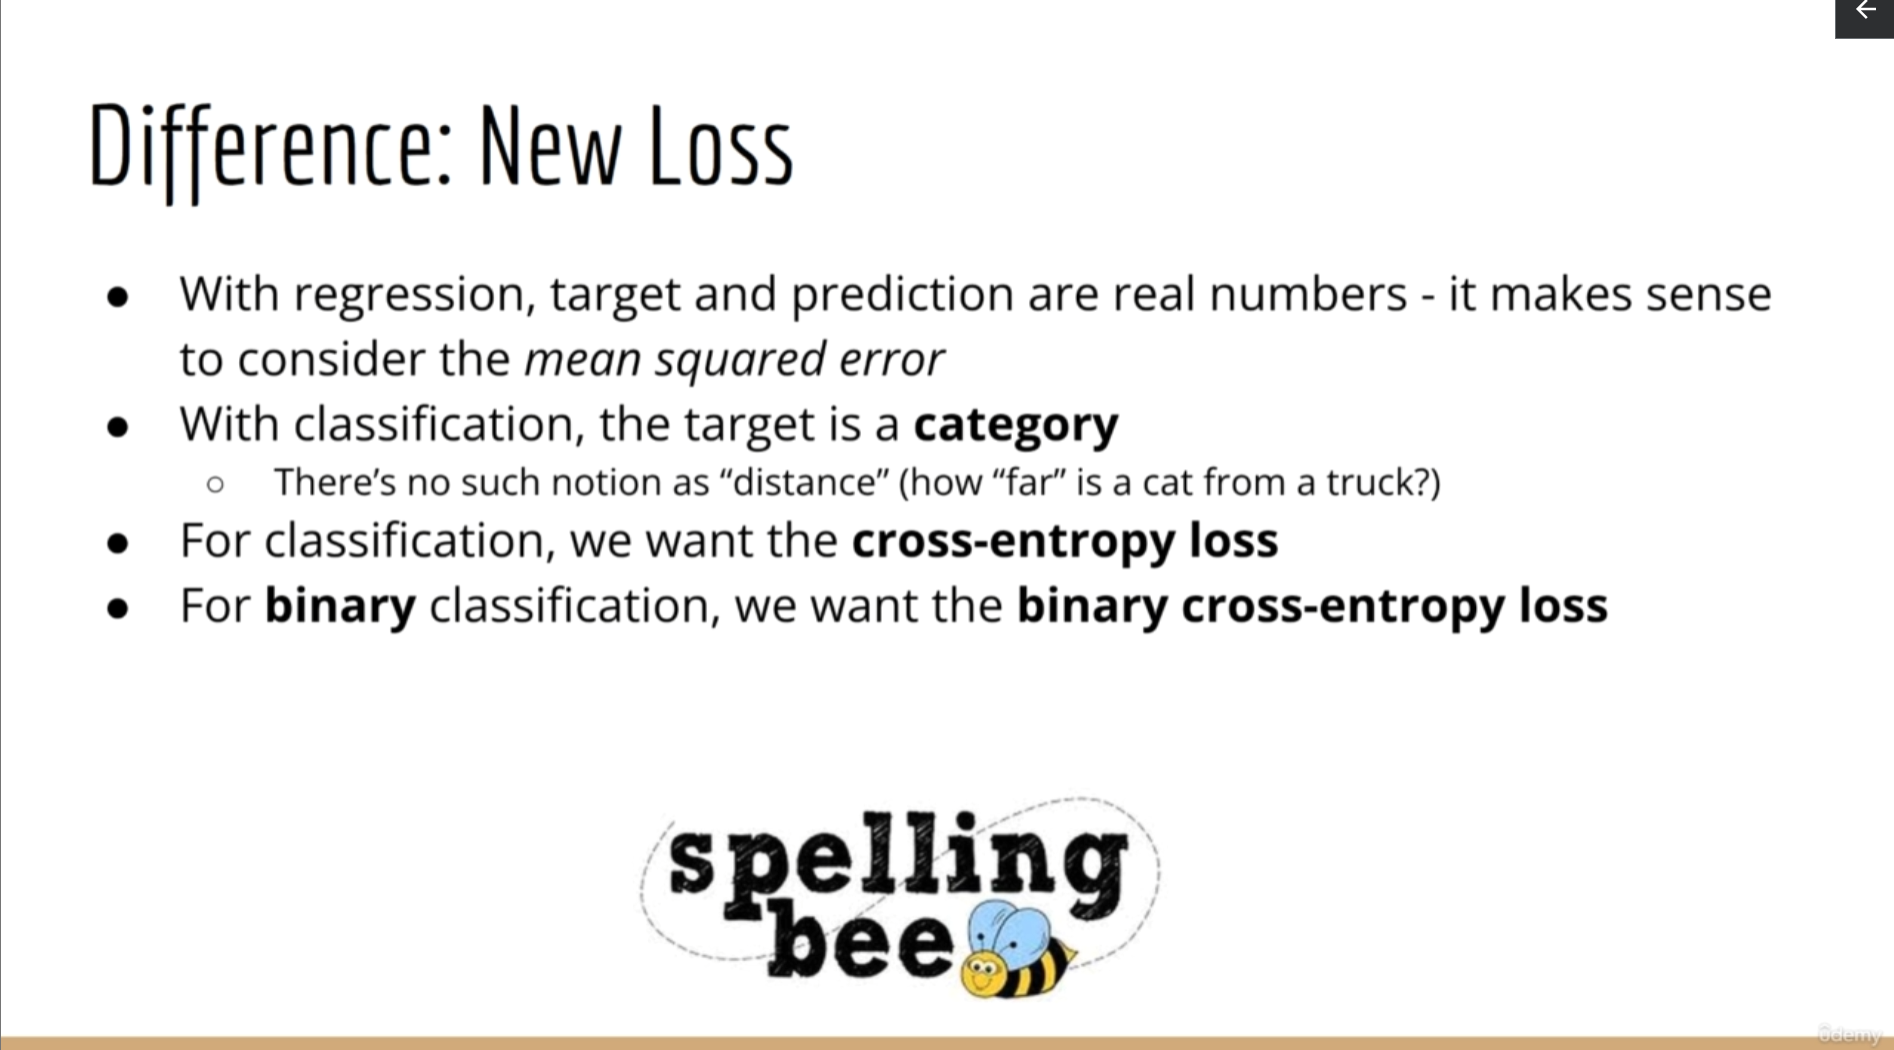

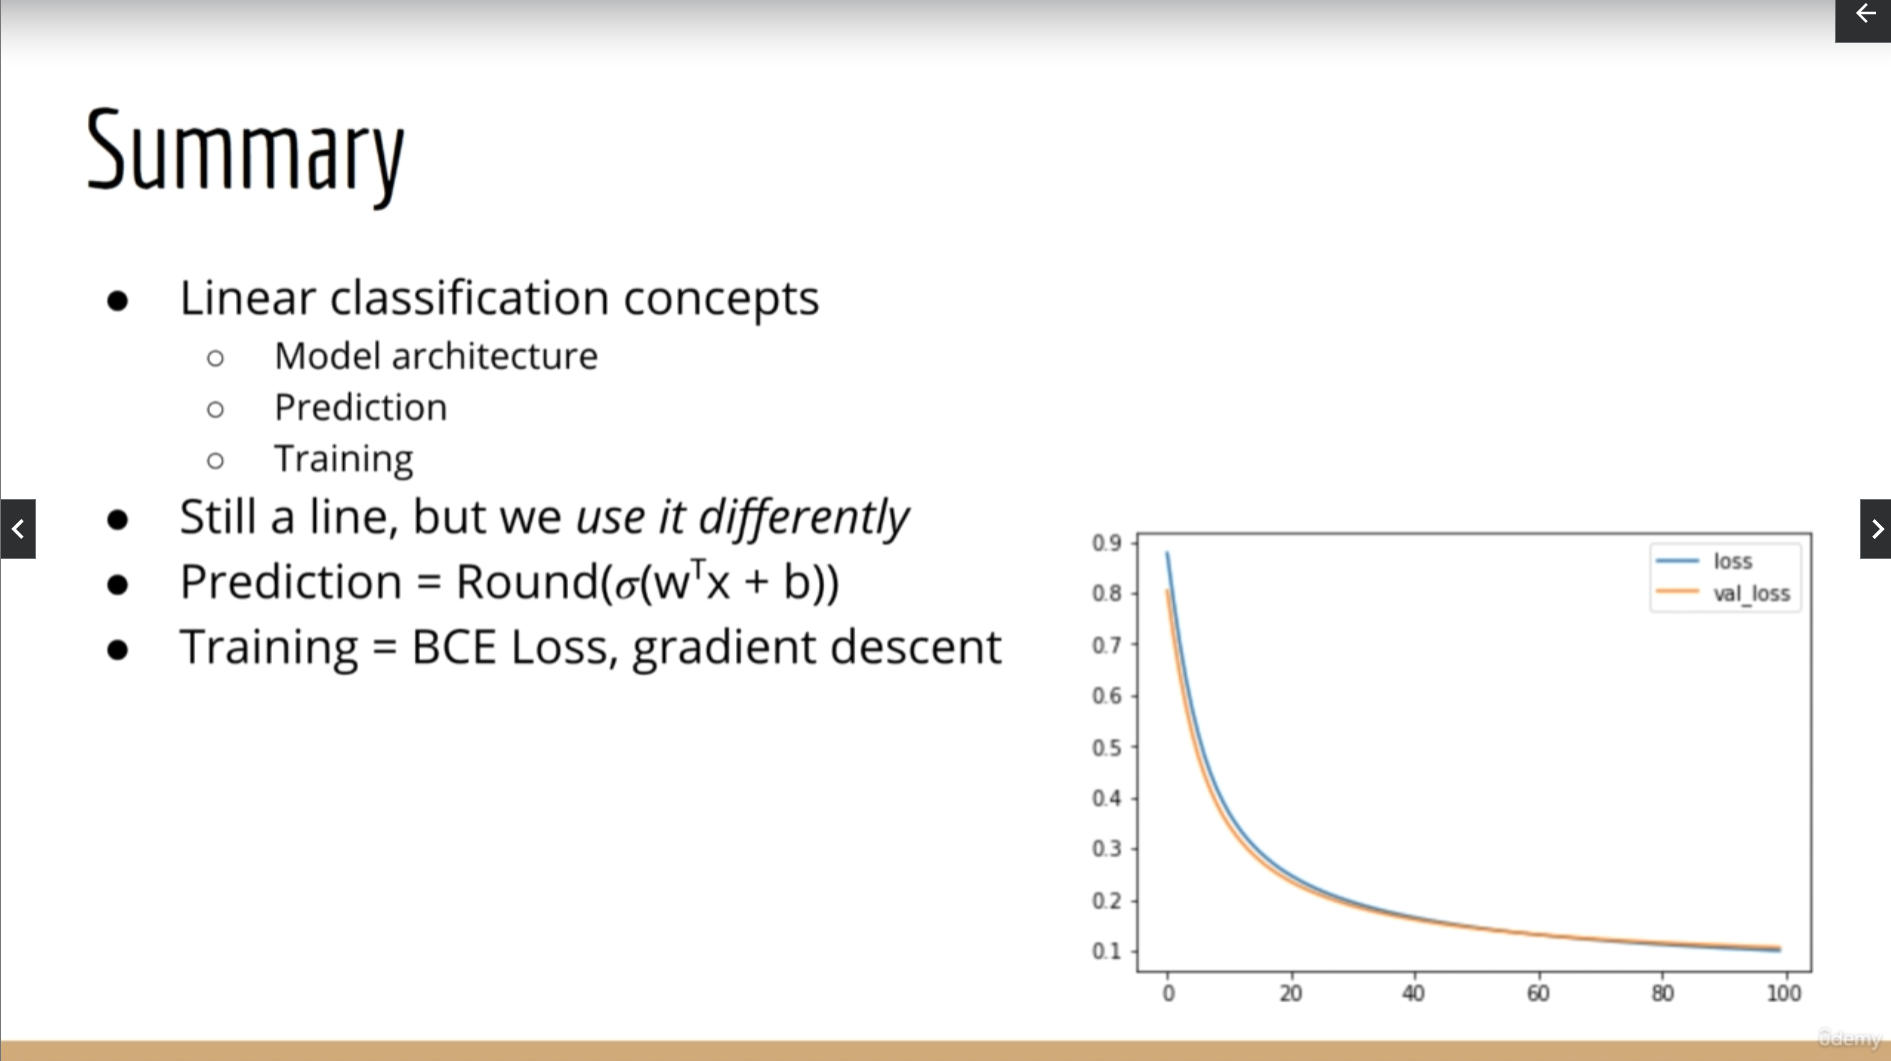

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [3]:
data.keys()
print(data.data)
data.data.shape


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


(569, 30)

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data.target.shape

(569,)

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, )
N, D = X_train.shape

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)


In [12]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)


for it in range(n_epochs):
    # zeroo the parameter gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward Pass and optimize
    loss.backward()
    optimizer.step()

    # Get test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # Save losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    # Save Accuracy
    train_accuracy[it] = np.mean(y_train.numpy() == np.round(outputs.detach().numpy())) 
    test_accuracy[it] = np.mean(y_test.numpy() == np.round(outputs_test.detach().numpy())) 

    if (it + 1) % 50 ==0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4384, Test Loss: 0.4294
Epoch 100/1000, Train Loss: 0.3325, Test Loss: 0.3299
Epoch 150/1000, Train Loss: 0.2711, Test Loss: 0.2730
Epoch 200/1000, Train Loss: 0.2312, Test Loss: 0.2355
Epoch 250/1000, Train Loss: 0.2033, Test Loss: 0.2087
Epoch 300/1000, Train Loss: 0.1829, Test Loss: 0.1886
Epoch 350/1000, Train Loss: 0.1672, Test Loss: 0.1731
Epoch 400/1000, Train Loss: 0.1549, Test Loss: 0.1608
Epoch 450/1000, Train Loss: 0.1448, Test Loss: 0.1509
Epoch 500/1000, Train Loss: 0.1365, Test Loss: 0.1426
Epoch 550/1000, Train Loss: 0.1295, Test Loss: 0.1357
Epoch 600/1000, Train Loss: 0.1235, Test Loss: 0.1299
Epoch 650/1000, Train Loss: 0.1183, Test Loss: 0.1249
Epoch 700/1000, Train Loss: 0.1138, Test Loss: 0.1206
Epoch 750/1000, Train Loss: 0.1098, Test Loss: 0.1169
Epoch 800/1000, Train Loss: 0.1062, Test Loss: 0.1136
Epoch 850/1000, Train Loss: 0.1030, Test Loss: 0.1107
Epoch 900/1000, Train Loss: 0.1001, Test Loss: 0.1082
Epoch 950/1000, Train Loss: 0

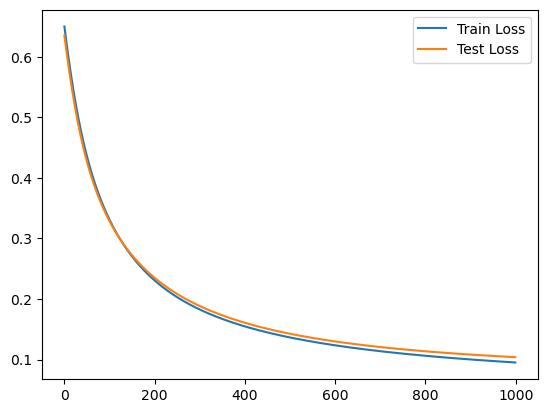

In [13]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

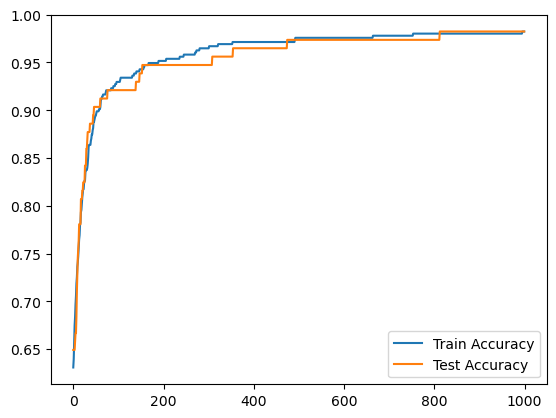

In [14]:
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

In [15]:
# Accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9824, Test acc: 0.9825
